In [10]:
# ===== 1. ライブラリ読み込み =====
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# ===== 2. SQLite からデータ読み込み =====
conn = sqlite3.connect("jobs.db")

df = pd.read_sql("""
SELECT
    job_title,
    company,
    salary_min,
    salary_max,
    remote,
    location
FROM jobs
WHERE salary_min IS NOT NULL
""", conn)

conn.close()

df

,job_title,company,salary_min,salary_max,remote,location
0,【キャリアコンサルタント_大阪】年収2000万円/業界トップクラスの還元率/成果主義・早期キ...,株式会社アークウィズコンサルティング,400,2000,1,大阪府
1,【ITエンジニア経験者】明確な評価制度/在宅/フルリモート/AWSのインフラ環境開発・設計メ...,株式会社TWOSTONE&Sons,600,960,1,フルリモート
2,急成長上場企業で事業とともに成長しませんか？事業のコアとなるIT人材営業を募集中！,株式会社スマレジ,450,650,1,東京都
3,【100%自社開発/フルリモート】Webサービスの新規開発を担う、バックエンドエンジニアを募集！,株式会社Wiz,400,580,1,フルリモート


In [12]:
# ===== 3. 年収の代表値（平均） =====
df["salary_avg"] = (df["salary_min"] + df["salary_max"]) / 2
df

,job_title,company,salary_min,salary_max,remote,location,salary_avg
0,【キャリアコンサルタント_大阪】年収2000万円/業界トップクラスの還元率/成果主義・早期キ...,株式会社アークウィズコンサルティング,400,2000,1,大阪府,1200.0
1,【ITエンジニア経験者】明確な評価制度/在宅/フルリモート/AWSのインフラ環境開発・設計メ...,株式会社TWOSTONE&Sons,600,960,1,フルリモート,780.0
2,急成長上場企業で事業とともに成長しませんか？事業のコアとなるIT人材営業を募集中！,株式会社スマレジ,450,650,1,東京都,550.0
3,【100%自社開発/フルリモート】Webサービスの新規開発を担う、バックエンドエンジニアを募集！,株式会社Wiz,400,580,1,フルリモート,490.0


In [13]:
# ===== 4. リモート判定を厳しく定義し直す =====
df["remote_strict"] = df["location"].fillna("").apply(
    lambda x: 1 if "フルリモート" in x else 0
)

df[["location", "remote_strict"]]

,location,remote_strict
0,大阪府,0
1,フルリモート,1
2,東京都,0
3,フルリモート,1


In [14]:
# ===== 5. 集計 =====
summary = (
    df.groupby("remote_strict")["salary_avg"]
    .mean()
    .reset_index()
)

summary["remote_label"] = summary["remote_strict"].map({
    0: "非リモート",
    1: "フルリモート"
})

summary

,remote_strict,salary_avg,remote_label
0,0,875.0,非リモート
1,1,635.0,フルリモート


/Users/ryuta/dsprog2_2025/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ryuta/dsprog2_2025/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ryuta/dsprog2_2025/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ryuta/dsprog2_2025/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ryuta/dsprog2_2025/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170:

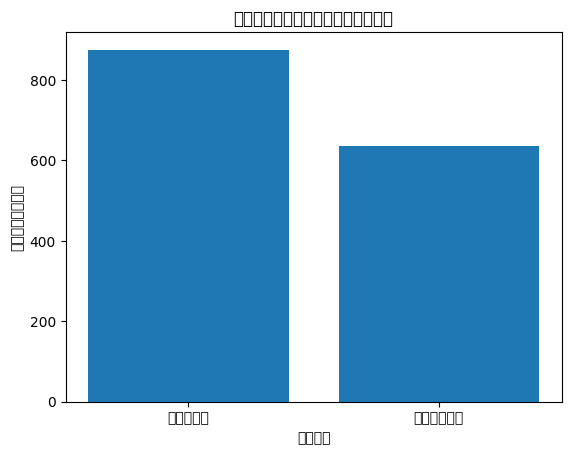

In [15]:
# ===== 6. 棒グラフ =====
plt.figure()
plt.bar(summary["remote_label"], summary["salary_avg"])
plt.xlabel("勤務形態")
plt.ylabel("平均年収（万円）")
plt.title("フルリモート可否と平均年収の比較")
plt.show()

In [16]:
# ===== 7. 件数確認（考察用） =====
df.groupby("remote_strict").size()

remote_strict
0    2
1    2
dtype: int64